Parte 2

In [4]:
def xor_bits(a, b):
    """
    Realiza a operação de XOR bit a bit entre duas strings binárias de mesmo comprimento.
    """
    resultado = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            resultado += '0'
        else:
            resultado += '1'
    return resultado


def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).
    
    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).
        
    Returns:
        A string binária de r bits representando o CRC.
    """
    # 1. Obtenha o grau 'r' do gerador.
    r = len(gerador_bits) - 1
    
    # 2. Crie T(x) = M(x) * 2^r, que é a mensagem com 'r' zeros anexados.
    mensagem_aumentada = list(dados_bits + '0' * r)
    
    # 3. Implemente o loop de divisão.
    for i in range(len(dados_bits)):
        # Se o bit mais significativo da 'janela' atual for '1', realize o XOR.
        if mensagem_aumentada[i] == '1':
            # A janela atual são os próximos r+1 bits
            janela_atual = "".join(mensagem_aumentada[i:i + r + 1])
            resultado_xor = xor_bits(janela_atual, gerador_bits)
            
            # Atualize a mensagem com o resultado do XOR
            for j in range(len(resultado_xor)):
                mensagem_aumentada[i + j] = resultado_xor[j]
    
    # 4. O resto da divisão são os 'r' bits finais da mensagem processada.
    resto = "".join(mensagem_aumentada[-r:])
    return resto


# Exemplo de uso para validação
dados_teste = "1101011111"  # M(x)
gerador_teste = "10011"    # G(x)
crc_calculado = calcular_crc_manual(dados_teste, gerador_teste)

print(f"Dados M(x): {dados_teste}")
print(f"Gerador G(x): {gerador_teste}")
print(f"CRC Calculado: {crc_calculado}")
# Quadro T(x) a ser transmitido: dados_teste + crc_calculado

Dados M(x): 1101011111
Gerador G(x): 10011
CRC Calculado: 0010


In [5]:
pip install crc

Note: you may need to restart the kernel to use updated packages.


Parte 3

Analisando para mensagem de 1500 bytes...
Analisando para mensagem de 3000 bytes...
Analisando para mensagem de 6000 bytes...
Analisando para mensagem de 16000 bytes...

--- Resultados Finais ---
[{'tamanho': 1500, 'tempo_manual': 0.22962870000628754, 'mem_pico_manual': 111.232421875, 'tempo_lib': 0.09573470000759698, 'mem_pico_lib': 4.1240234375}, {'tamanho': 3000, 'tempo_manual': 0.4081439000146929, 'mem_pico_manual': 211.2197265625, 'tempo_lib': 0.16586219999589957, 'mem_pico_lib': 1.2109375}, {'tamanho': 6000, 'tempo_manual': 0.8602676000155043, 'mem_pico_manual': 422.1572265625, 'tempo_lib': 0.3245712999778334, 'mem_pico_lib': 1.2109375}, {'tamanho': 16000, 'tempo_manual': 2.1715876999951433, 'mem_pico_manual': 1125.2822265625, 'tempo_lib': 0.8908222999889404, 'mem_pico_lib': 2.34375}]


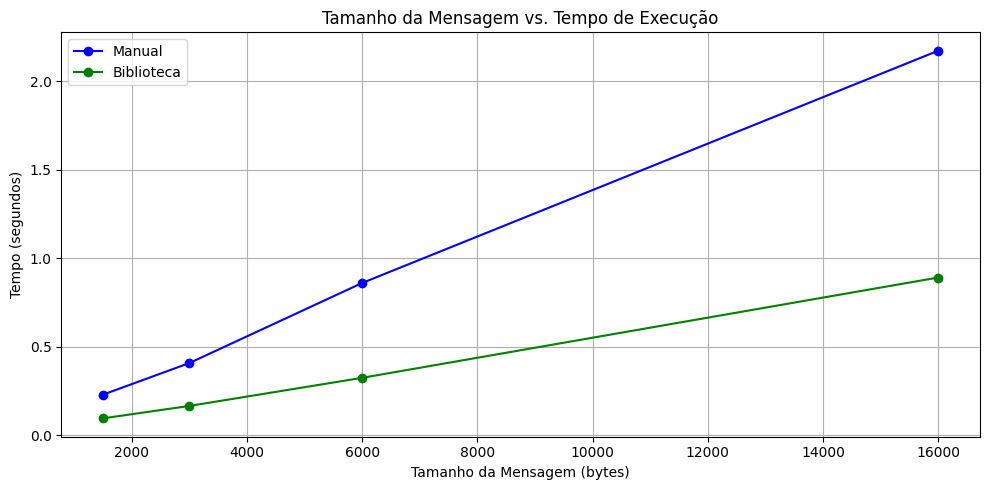

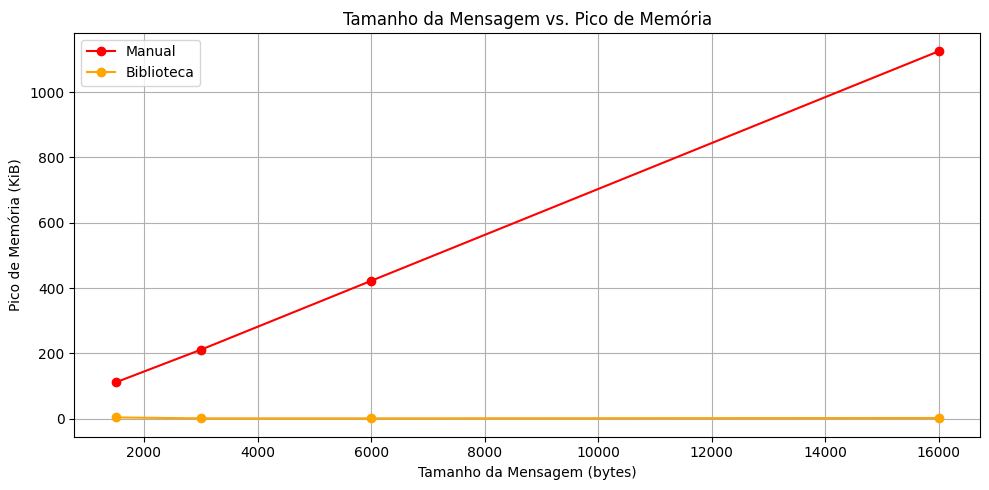


--- Resultados ---
Tamanho: 1500 bytes
  Manual -> Tempo: 0.229629s | Memória: 111.23 KB
  Lib    -> Tempo: 0.095735s | Memória: 4.12 KB

Tamanho: 3000 bytes
  Manual -> Tempo: 0.408144s | Memória: 211.22 KB
  Lib    -> Tempo: 0.165862s | Memória: 1.21 KB

Tamanho: 6000 bytes
  Manual -> Tempo: 0.860268s | Memória: 422.16 KB
  Lib    -> Tempo: 0.324571s | Memória: 1.21 KB

Tamanho: 16000 bytes
  Manual -> Tempo: 2.171588s | Memória: 1125.28 KB
  Lib    -> Tempo: 0.890822s | Memória: 2.34 KB



In [22]:
import time
import tracemalloc
import os
from crc import Calculator, Crc16
import matplotlib.pyplot as plt


# --- Insira sua função calcular_crc_manual e xor_bits aqui ---

 # Usando um padrão de 16 bits como referência
calculator_lib = Calculator(Crc16.MODBUS)

# Tamanhos de mensagem para teste (em bytes)
tamanhos_bytes = [1500, 3000 , 6000 , 16000]

resultados = []

for tamanho in tamanhos_bytes:
    print(f"Analisando para mensagem de {tamanho} bytes...")
    # Gere uma mensagem aleatória de bits
    mensagem_bytes = os.urandom(tamanho)
    mensagem_bits = "".join(format(byte, '08b') for byte in mensagem_bytes)
    
    # Medição da nossa Implementação
    tracemalloc.start()
    start_time = time.perf_counter()
    
    crc_manual = calcular_crc_manual(mensagem_bits, "11000000000000101") # G(x) do CRC-16/MODBUS
    
    end_time = time.perf_counter()
    mem_atual_manual, mem_pico_manual = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    tempo_manual = end_time - start_time
    
    # Medição da Biblioteca
    tracemalloc.start()
    start_time = time.perf_counter()
    
    crc_lib = calculator_lib.checksum(mensagem_bytes)
    
    end_time = time.perf_counter()
    mem_atual_lib, mem_pico_lib = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    tempo_lib = end_time - start_time
    
    # Armazene os resultados
    resultados.append({
        "tamanho": tamanho,
        "tempo_manual": tempo_manual,
        "mem_pico_manual": mem_pico_manual / 1024, # em KiB
        "tempo_lib": tempo_lib,
        "mem_pico_lib": mem_pico_lib / 1024 # em KiB
    })

print("\n--- Resultados Finais ---")
print(resultados)

# ----------------------------
# Plot 
# ----------------------------

# Dados para gráfico
tamanhos = [r["tamanho"] for r in resultados]
tempos_manual = [r["tempo_manual"] for r in resultados]
tempos_lib = [r["tempo_lib"] for r in resultados]
mem_manual = [r["mem_pico_manual"] for r in resultados]
mem_lib = [r["mem_pico_lib"] for r in resultados]

# Gráfico 1 – Tamanho da mensagem x Tempo de Execução
plt.figure(figsize=(10, 5))
plt.plot(tamanhos, tempos_manual, marker='o', label="Manual", color='blue')
plt.plot(tamanhos, tempos_lib, marker='o', label="Biblioteca", color='green')
plt.title("Tamanho da Mensagem vs. Tempo de Execução")
plt.xlabel("Tamanho da Mensagem (bytes)")
plt.ylabel("Tempo (segundos)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico 2 – Tamanho da mensagem x Pico de Memória
plt.figure(figsize=(10, 5))
plt.plot(tamanhos, mem_manual, marker='o', label="Manual", color='red')
plt.plot(tamanhos, mem_lib, marker='o', label="Biblioteca", color='orange')
plt.title("Tamanho da Mensagem vs. Pico de Memória")
plt.xlabel("Tamanho da Mensagem (bytes)")
plt.ylabel("Pico de Memória (KiB)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# Resultados
# ----------------------------

print("\n--- Resultados ---")
for r in resultados:
    print(f"Tamanho: {r['tamanho']} bytes")
    print(f"  Manual -> Tempo: {r['tempo_manual']:.6f}s | Memória: {r['mem_pico_manual']:.2f} KB")
    print(f"  Lib    -> Tempo: {r['tempo_lib']:.6f}s | Memória: {r['mem_pico_lib']:.2f} KB\n")

Máquina que executou o código: Intel Core i5-8250U @ 1.60GHz, NVIDIA GeForce MX130 2GB VRAM, 4GB DDR4, 224GB HDD

Parte 4.1

In [15]:
def xor_bits(a, b):
    """
    Realiza a operação de XOR bit a bit entre duas strings binárias de mesmo comprimento.
    """
    resultado = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            resultado += '0'
        else:
            resultado += '1'
    return resultado


def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).
    """
    r = len(gerador_bits) - 1
    mensagem_aumentada = list(dados_bits + '0' * r)

    for i in range(len(dados_bits)):
        if mensagem_aumentada[i] == '1':
            janela = "".join(mensagem_aumentada[i : i + len(gerador_bits)])
            resultado_xor = xor_bits(janela, gerador_bits)
            for j in range(len(resultado_xor)):
                mensagem_aumentada[i + j] = resultado_xor[j]

    return "".join(mensagem_aumentada[-r:])


#  Dados Pessoais 
nome = "Arthur Vidal Regis Gouveia"
final_matricula = 5

# Converter nome para binário
mensagem_bits = "".join(format(ord(c), "08b") for c in nome)
gerador_bits = "1100000100010001"   # CRC-16/ARC


# Calcular o CRC
crc = calcular_crc_manual(mensagem_bits, gerador_bits)

# Resultados
print("===Resultados===\n")
print(f"Nome: {nome}\n")
print(f"Final da matrícula: {final_matricula}\n")
print(f"Mensagem Base (em bits):\n{mensagem_bits}\n")
print(f"Polinômio Gerador (bits): {gerador_bits}\n")
print(f"CRC calculado: {crc}\n")
print(f"Quadro a ser transmitido: {mensagem_bits + crc}\n")



===Resultados===

Nome: Arthur Vidal Regis Gouveia

Final da matrícula: 5

Mensagem Base (em bits):
0100000101110010011101000110100001110101011100100010000001010110011010010110010001100001011011000010000001010010011001010110011101101001011100110010000001000111011011110111010101110110011001010110100101100001

Polinômio Gerador (bits): 1100000100010001

CRC calculado: 110001010101110

Quadro a ser transmitido: 0100000101110010011101000110100001110101011100100010000001010110011010010110010001100001011011000010000001010010011001010110011101101001011100110010000001000111011011110111010101110110011001010110100101100001110001010101110

